# Quick Recaps

## The Transformers Lifecycle

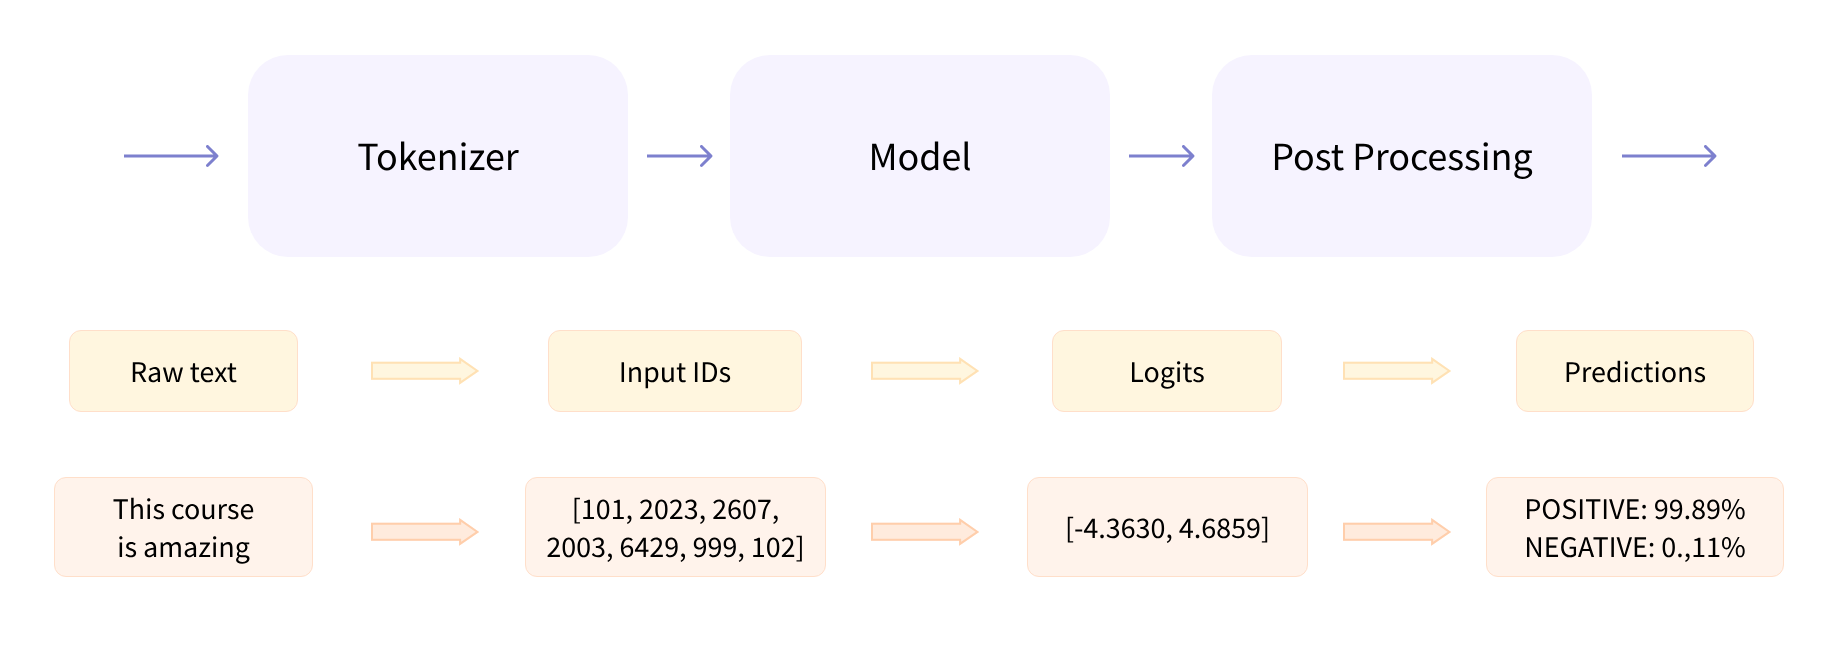

## FineTuning (Transfer Learning)

Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

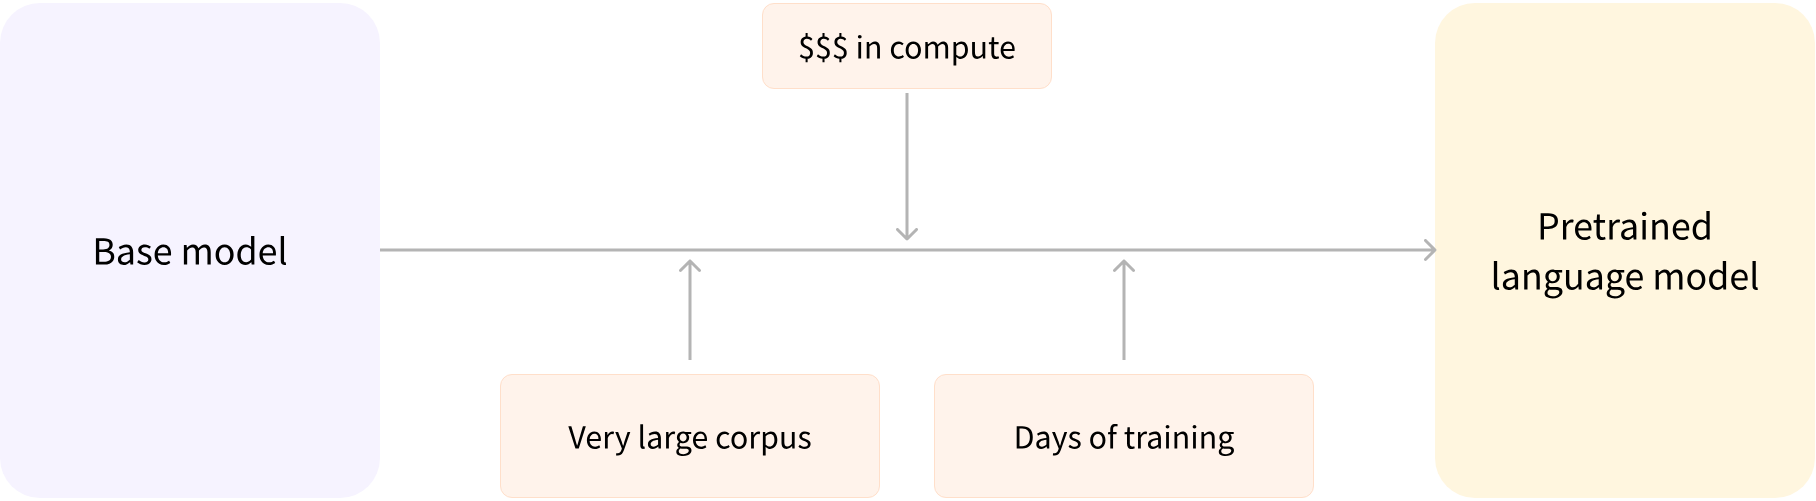




Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train the model for your final use case from the start (scratch)? There are a couple of reasons:

* The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
* Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
* For the same reason, the amount of time and resources needed to get good results are much lower.
For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term transfer learning.

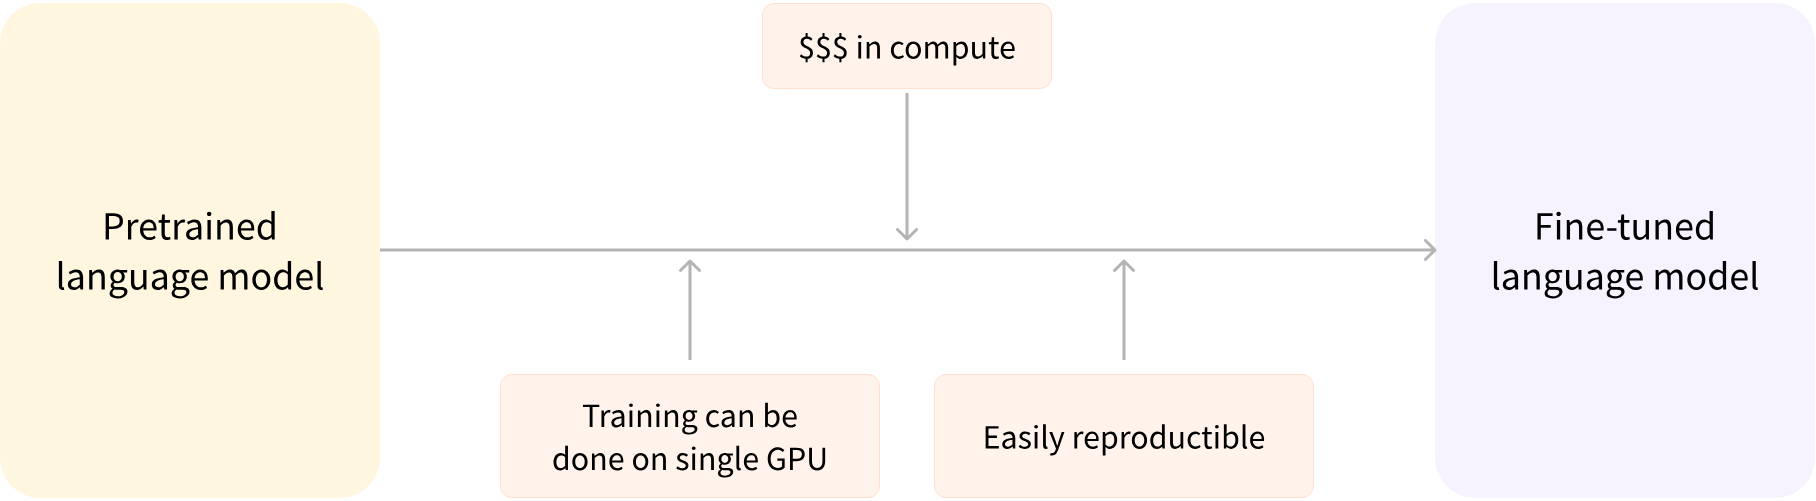

Fine-tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

## The Hugging Face Library


*   [Models Hub](https://huggingface.co/models)
*   [Datasets](https://huggingface.co/datasets)



### 1. The Tokenizer Class

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer("This is the first sentence.", "This is the second one.")
tokens

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(tokens["input_ids"])

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 'sentence',
 '.',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 'one',
 '.',
 '[SEP]']

### 2. The AutoModels Class

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

### 3. The TrainingArguments Class

In [ ]:
from transformers import TrainingArguments
help(TrainingArguments)

Help on class TrainingArguments in module transformers.training_args:

class TrainingArguments(builtins.object)
 |  TrainingArguments(output_dir: str, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, evaluation_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.SchedulerType, str] = 'linear', warmup_ratio: float = 0.0, wa

### 4. The Trainer Class


```
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)
```



# Quick New Concepts

## LoRA (Low-Rank Adaptation): https://en.wikipedia.org/wiki/Rank_factorization


### Think PCA - Principal Component Analysis!!

LoRA (Low-Rank Adaptation) is a technique for fine-tuning large machine learning models efficiently.

- A **low-rank matrix** is a matrices where most of the information can be captured using fewer rows or columns than its full size. In simpler terms, the matrix can be approximated with much fewer dimensions while still retaining most of its essential information.

- In the context of LoRA, this means instead of working with a big, dense matrix to train the model, LoRA replaces it with two much smaller matrices that approximate the original matrix. This makes computations lighter and more efficient because the smaller matrices require less memory and computational power to process.

Here’s an example:

1. **Original High-Rank Matrix**:
   
   \begin{bmatrix}
   2 & 4 & 6 \\
   1 & 3 & 5 \\
   0 & -1 & -2
   \end{bmatrix}
   

   This matrix is full rank (rank = 3).

2. **Low-Rank Approximation**:
   By using two smaller matrices, $U$ and $V$:

   $U$ =
   \begin{bmatrix}
   1 & 0 \\
   0 & 1 \\
   -1 & 1
   \end{bmatrix}


   and  


   $V$= \begin{bmatrix}
   2 & 3 & 4 \\
   1 & -1 & -2
   \end{bmatrix},

   We approximate the original matrix as:
   $U$ $\times$ $V$ = \begin{bmatrix}
   2 & 3 & 4 \\
   1 & -1 & -2 \\
   -1 & -4 & -6
   \end{bmatrix}

The **low-rank approximation** is simpler but may lose some detail compared to the original matrix. This reduced representation is computationally cheaper while still capturing key features.

## Quantization

**Quantization** in machine learning is like turning detailed, high-resolution data into a simpler, lower-resolution version. It’s a process used to reduce the size of models and make them faster, especially when running on hardware with limited resources (like phones or embedded systems).

### How it Works:
1. **Original Precision**: Neural networks usually use numbers in 32-bit floating-point format (high precision).
2. **Quantized Precision**: Quantization reduces this to lower precision, like 8-bit integers. Instead of storing and computing with very precise numbers, the values are rounded or scaled to fit into fewer bits.

For example:
- A weight in a neural network might originally be \( 0.123456 \) (32-bit floating-point).
- After quantization, it might become \( 0.12 \) (rounded or scaled to 8-bit floating point).

### Why Use Quantization?
- **Smaller Models**: Quantized models use less memory, making them easier to store and transfer.
- **Faster Computations**: Lower-precision arithmetic requires less compute power.
- **Efficiency**: Ideal for edge devices like smartphones, where compute and storage are limited.

### Trade-Offs:
Quantization can slightly reduce model accuracy because precision is lost during the conversion. However, advanced techniques like fine-tuning on quantized weights or mixed-precision training can mitigate this.

# Finally, Fine-Tuning Llama2

## But, first..


*   Setup your HF account: https://huggingface.co/join
*   Get access to the Meta's llama2: https://llama.meta.com/llama-downloads/
*   Create HF tokens: https://huggingface.co/settings/tokens



## Setup

In [ ]:
! pip install accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.30.2 trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.1
    Uninst

In [ ]:
! pip install datasets

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token has not been saved to git credential helper.


## Importing the libraries

In [ ]:
from transformers import AutoTokenizer

In [ ]:
import torch
from datasets import load_dataset
from peft import LoraConfig # Quantization
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, TrainingArguments
from trl import SFTTrainer # Supervised FineTuning Trainer

## Getting the dataset

In [ ]:
data = load_dataset("timdettmers/openassistant-guanaco", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
data

Dataset({
    features: ['text'],
    num_rows: 9846
})

## Setting up the tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", use_auth_token=True)
tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:809: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like meta-llama/Llama-2-7b-hf is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

**`tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", use_auth_token=True)`**
* The `AutoTokenizer` class is part of the Hugging Face Transformers library and is used to load a pre-trained tokenizer. A tokenizer is responsible for breaking down a text into individual tokens (words, subwords, or characters) and is a crucial component when working with natural language processing tasks.
* `"meta-llama/Llama-2-7b-hf"` is the identifier for a specific pre-trained model. In this case, it's a model named "Llama-2-7b" provided by the "meta-llama" repository on Hugging Face Model Hub.
* `use_auth_token=True` indicates that authentication tokens should be used, which is relevant when accessing certain models on the Hugging Face Model Hub that require authentication.

**`tokenizer.pad_token = tokenizer.eos_token`**
* After creating the tokenizer, this line of code sets the `pad_token` attribute of the tokenizer to be the same as the `eos_token` (end-of-sequence token).
* In many natural language processing tasks, padding is used to make input sequences of variable length uniform, and the padding token is typically a special token that represents no actual content. By setting `pad_token` to `eos_token`, it implies that the end-of-sequence token will also be used for padding.
* This adjustment might be made for the sake of consistency or simplicity in handling padding within the code.


In summary, these lines of code load a pre-trained tokenizer for the `"Llama-2-7b"` model, with authentication, and then configure the tokenizer to use the end-of-sequence token as the padding token.

## Quantization Setup

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype="float16", bnb_4bit_use_double_quant=True
)

**`bnb_config = BitsAndBytesConfig()`**
* This line initializes a configuration object named `bnb_config` based on the `BitsAndBytesConfig` class.

**`load_in_4bit=True`**
* This parameter, `load_in_4bit`, is set to `True`. It suggests that the data will be loaded in a 4-bit format.
* The term "4-bit" typically refers to a low-precision representation of numerical values, which can be more memory-efficient but may sacrifice some precision.

**`bnb_4bit_quant_type="nf4"`**
* This parameter, `bnb_4bit_quant_type`, is set to the string value `"nf4"`.
* It specifies a specific quantization type or method for the 4-bit representation. fp4 vs nf4?

**`bnb_4bit_compute_dtype="float16"`**

* This parameter, `bnb_4bit_compute_dtype`, is set to the string value `"float16"`.
* Indicates the data type used for computations during the 4-bit quantization process. In this case, computations are performed using 16-bit floating-point precision (float16), which is another form of reduced precision compared to the more common 32-bit floating-point representation.

**`bnb_4bit_use_double_quant=True`**

* It suggests that double quantization is enabled. Double quantization involves applying quantization to the data or model representation more than once, potentially with different settings or levels of precision.


These lines of code configure a `BitsAndBytes` component with specific settings related to loading data in a 4-bit format, specifying a quantization type, setting the computation data type to float16, and enabling double quantization.

## Setting up the Model - For Quantization

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Llama-2-7b-hf", quantization_config=bnb_config, device_map={"": 0}
)

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

**`AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf")`**
* `AutoModelForCausalLM` is a class provided by the Hugging Face Transformers library. It's a convenience method for loading pre-trained models specifically designed for causal language modeling (predicts the next token in a sequence of tokens).
* `from_pretrained` is a method used to instantiate a model from pre-trained weights. In this case, the model is loaded from the `"meta-llama/Llama-2-7b-hf"` checkpoint.

**`quantization_config=bnb_config`**
* `The quantization_config` parameter is used to specify the quantization configuration for the model. The `bnb_config` object, which was defined earlier and contains settings related to 4-bit quantization, is passed to configure the quantization of the loaded model.

**`device_map={"": 0}`**
* The `device_map` parameter is used to specify the mapping of model components to specific devices. In this case, it's indicating that the model should be placed on device `0` (a GPU). The mapping is specified as a dictionary where the key is an empty string (""), which often represents the default device.

These lines of code load a pre-trained model for causal language modeling from the `"Llama-2-7b-hf"` checkpoint, configure it with a specified quantization setup (`bnb_config`), and place it on a specific device (`GPU 0`).

In [ ]:
model.config.use_cache=False
model.config.pretraining_tp=1 # tensor parallelism

## Setting up the Model - For LoRA

8 bit int: -127 to 126

3834/32 = 119

In [ ]:
from peft import LoraConfig
help(LoraConfig)

Help on class LoraConfig in module peft.tuners.lora.config:

class LoraConfig(peft.config.PeftConfig)
 |  LoraConfig(peft_type: Union[str, peft.utils.peft_types.PeftType, NoneType] = None, auto_mapping: Optional[dict] = None, base_model_name_or_path: Optional[str] = None, revision: Optional[str] = None, task_type: Union[str, peft.utils.peft_types.TaskType, NoneType] = None, inference_mode: bool = False, r: 'int' = 8, target_modules: 'Optional[Union[list[str], str]]' = None, lora_alpha: 'int' = 8, lora_dropout: 'float' = 0.0, fan_in_fan_out: 'bool' = False, bias: "Literal['none', 'all', 'lora_only']" = 'none', use_rslora: 'bool' = False, modules_to_save: 'Optional[list[str]]' = None, init_lora_weights: "bool | Literal['gaussian', 'olora', 'pissa', 'pissa_niter_[number of iters]', 'loftq']" = True, layers_to_transform: 'Optional[Union[list[int], int]]' = None, layers_pattern: 'Optional[Union[list[str], str]]' = None, rank_pattern: 'Optional[dict]' = <factory>, alpha_pattern: 'Optional[di

In [ ]:
peft_config = LoraConfig(
    r=64, lora_alpha=32, lora_dropout=0.05, bias="none", task_type="CAUSAL_LM"
)

**`model.config.use_cache=False`**
* In Hugging Face Transformers, the cache is used to store intermediate computations during model inference to speed up subsequent predictions. By setting `use_cache` to `False`, it indicates that the cache should not be used during inference.

**`model.config.pretraining_tp=1`**
* Setting `config.pretraining_tp` tensor parallelism: https://huggingface.co/docs/transformers/main/perf_train_gpu_many#tensor-parallelism

**`peft_config = LoraConfig(r=64, lora_alpha=32, lora_dropout=0.05, bias="none", task_type="CAUSAL_LM")`**
* This line creates an instance of the LoraConfig class and assigns it to the variable peft_config.
* r=64: Lower rank results in smaller update matrices with fewer trainable parameters.
* lora_alpha=32: LoRA scaling factor.
* bias="none": Specifies if the bias parameters should be trained. Can be 'none', 'all' or 'lora_only'.

## Setting the Training Args

In [ ]:
training_arguments = TrainingArguments(
    output_dir="llama2_finetuned_chatbot",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    optim="paged_adamw_4bit",
    learning_rate=2e-4,
    lr_scheduler_type="linear",
    save_strategy="epoch",
    logging_steps=1,
    num_train_epochs=1,
    max_steps=10,
    push_to_hub=True
)

**`output_dir="llama2_finetuned_chatbot"`**
* `output_dir` specifies the directory where the model checkpoints, logs, and other outputs will be stored during and after training. In this case, it is set to `"llama2_finetuned_chatbot."`

**`per_device_train_batch_size=8`**
* `per_device_train_batch_size` sets the batch size per GPU (or per training device) during training. In this case, it is set to `8`.

**`gradient_accumulation_steps=4`**
* `gradient_accumulation_steps` determines the number of batches to accumulate gradients before performing a backward pass and updating the model's parameters.
* This is useful for simulating larger batch sizes. Here, it is set to 4.

**`optim="paged_adamw_4bit"`**
* `optim` specifies the optimizer to be used during training. In this case, it is set to `"paged_adamw_8bit."` This refers to a variant of `Adam` with 4-bit quantization.

**`learning_rate=2e-4`**
* `learning_rate` sets the initial learning rate for the optimizer. Here, it is set to `2e-4 (0.0002)`.

**`lr_scheduler_type="linear"`**
* `lr_scheduler_type` determines the type of learning rate scheduler used during training. Here, it is set to "linear," which suggests a linear learning rate schedule.

**`save_strategy="epoch"`**
* `save_strategy` determines when to save model checkpoints. In this case, it is set to "epoch," meaning that the model will be saved at the end of each epoch during training.

**`logging_steps=10`**
* `logging_steps` specifies the frequency at which training logs (such as loss values) will be printed to the console. Here, logs will be printed every 10 steps.


**`num_train_epochs=1` **
* `num_train_epochs` sets the total number of training epochs. Here, it is set to 1, meaning that the model will be trained for one pass through the entire training dataset.

**`max_steps=10`**
* `max_steps` sets the maximum number of training steps. Here, it is set to `10`, indicating that training will stop after 10 steps.

**`push_to_hub=True`**
* `push_to_hub` specifies whether to push the trained model to the Hugging Face Model Hub after training. Setting it to True implies that the model will be uploaded to the hub.

These lines define various training parameters and configurations for a language model, specifying details such as the output directory, batch size, optimizer, learning rate, scheduler, and training duration.


## Setting up the Trainer

In [ ]:
trainer = SFTTrainer(
    model=model,
    train_dataset=data,
    peft_config=peft_config,
    dataset_text_field="text",
    args=training_arguments,
    tokenizer=tokenizer,
    packing=False, # HOMEWORK
    max_seq_length=512
)

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


Map:   0%|          | 0/9846 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/sampurnr/llama2_finetuned_chatbot into local empty directory.


Download file adapter_model.bin:   0%|          | 24.0k/128M [00:00<?, ?B/s]

Download file training_args.bin: 100%|##########| 4.30k/4.30k [00:00<?, ?B/s]

Download file runs/Mar02_07-36-15_4c9a27336fee/events.out.tfevents.1709365003.4c9a27336fee.421.0: 100%|#######…

Download file tokenizer.model:   7%|6         | 32.0k/488k [00:00<?, ?B/s]

Clean file training_args.bin:  23%|##3       | 1.00k/4.30k [00:00<?, ?B/s]

Clean file runs/Mar02_07-36-15_4c9a27336fee/events.out.tfevents.1709365003.4c9a27336fee.421.0:  21%|##1       …

Clean file tokenizer.model:   0%|          | 1.00k/488k [00:00<?, ?B/s]

Clean file adapter_model.bin:   0%|          | 1.00k/128M [00:00<?, ?B/s]

## Training

In [ ]:
trainer.train()
trainer.push_to_hub()